<a href="https://colab.research.google.com/github/ducminh79/PDD007_GenAI/blob/main/t_test_Dataset_2_%26_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Connect to the Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/data

!pwd

!ls


/content/drive/MyDrive/data
/content/drive/MyDrive/data
dataset_runs_6_test_case_3_v2.csv  dataset_runs_6_v2.csv


## Import Library

In [ ]:
!pip install pandas openpyxl

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#for interactive graph
import plotly.graph_objects as go
from plotly.subplots import make_subplots

##Load the dataseet and merged a data2 & 3
testcase 2 is titanic, testcase 3 is about the travle

In [ ]:
#Load the dataset
df_case2 = pd.read_csv('dataset_runs_6_v2.csv')
df_case3 = pd.read_csv('dataset_runs_6_test_case_3_v2.csv')
print(df_case2.columns)
print(df_case3.columns)

Index(['run_id', 'participant_name', 'test_case_id', 'used_ai', 'duration_min',
       'data_usage_total_MB', 'data_usage_downstream_MB',
       'data_usage_upstream_MB', 'data_usage_efficiency',
       'unique_sources_count', 'keyboard_strokes_count', 'mouse_clicks_count'],
      dtype='object')
Index(['run_id', 'participant_name', 'test_case_id', 'used_ai', 'duration_min',
       'data_usage_total_MB', 'data_usage_downstream_MB',
       'data_usage_upstream_MB', 'data_usage_efficiency',
       'unique_sources_count', 'keyboard_strokes_count', 'mouse_clicks_count'],
      dtype='object')


In [ ]:
# Concatenate the two datasets
df_combined = pd.concat([df_case2, df_case3], ignore_index=True)

# Display the combined dataframe
print(df_combined.head())

   run_id participant_name  test_case_id  used_ai  duration_min  \
0       1           Seoyun             2     True         34.75   
1       1           Seoyun             2    False         82.70   
2       2              Hai             2     True         20.30   
3       2              Hai             2    False         76.80   
4       3            Phobe             2     True         13.90   

   data_usage_total_MB  data_usage_downstream_MB  data_usage_upstream_MB  \
0           113.881836                112.423828                1.458008   
1           655.815430                639.003906               16.811523   
2             7.367188                  7.132812                0.234375   
3           319.585938                312.393555                7.192383   
4             5.106445                  3.535156                1.571289   

   data_usage_efficiency  unique_sources_count  keyboard_strokes_count  \
0               1.000000                     1                  18

save the merge dataset on google drive

In [ ]:
# df_combined.to_csv('/content/drive/My Drive/Capstone/df_test_combined.csv', index=False)

df_combined.to_csv('df_test_combined.csv', index=False)

In [ ]:
mergedf = pd.read_csv("df_test_combined.csv")

In [ ]:
mergedf.head()

,run_id,participant_name,test_case_id,used_ai,duration_min,data_usage_total_MB,data_usage_downstream_MB,data_usage_upstream_MB,data_usage_efficiency,unique_sources_count,keyboard_strokes_count,mouse_clicks_count
0,1,Seoyun,2,True,34.75,113.881836,112.423828,1.458008,1.000000,1,188213,111798
1,1,Seoyun,2,False,82.70,655.815430,639.003906,16.811523,0.362432,13,4523658,1617032
2,2,Hai,2,True,20.30,7.367188,7.132812,0.234375,1.000000,2,7965,2552
3,2,Hai,2,False,76.80,319.585938,312.393555,7.192383,0.563877,15,2720072,553329
4,3,Phobe,2,True,13.90,5.106445,3.535156,1.571289,1.000000,1,50023,22838


##T-test
- Null Hypothesis (H₀): There is no significant difference between the two groups(used_ai = 0 , used_ai = 1) (or no significant relationship, depending on the test).

- Alternative Hypothesis (H₁): There is a significant difference between the two groups, or there is a relationship between them.

###Get a P-value

In [ ]:
# Import library for box plot and stats
from google.colab import drive
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

####P-value of Test case 2 and Test case 3


####independent sample t-test FOR TEST 2

In [ ]:
# Filter the data for Test Case 2  graph
test_case_2 = mergedf[mergedf['test_case_id'] == 2]

# Split each test case by `used_ai` groups
# Test Case 2
test_case_2_ai_0 = test_case_2[test_case_2['used_ai'] == 0]  # AI not used
test_case_2_ai_1 = test_case_2[test_case_2['used_ai'] == 1]  # AI used

# T-test for Test case 2 Total data usage
t_statistic_data, p_value_data_usage = stats.ttest_ind(test_case_2_ai_0['data_usage_total_MB'], test_case_2_ai_1['data_usage_total_MB'])
print("\n---------------Test case 2--------------")
print("T-test for total_data_usage:")
print("T-statistic:", t_statistic_data)
print(f"P-value: {p_value_data_usage:.8f}")

# T-test for Test case 2 Total duration_min
t_statistic_time, p_value_time = stats.ttest_ind(test_case_2_ai_0['duration_min'], test_case_2_ai_1['duration_min'])
print("\nT-test for total_time:")
print("T-statistic:", t_statistic_time)
print(f"P-value: {p_value_time:.8f}")
print("\n----------------------------------------")


---------------Test case 2--------------
T-test for total_data_usage:
T-statistic: 3.6616174419594456
P-value: 0.00437736

T-test for total_time:
T-statistic: 8.240628685193004
P-value: 0.00000907

----------------------------------------


In [ ]:
if p_value_data_usage < 0.05:
  print("There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.")
else:
  print("We fail to reject the null hypothesis, meaning we do not have enough evidence to claim a significant difference or relationship")

if p_value_time < 0.05:
  print("There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.")
else:
  print("We fail to reject the null hypothesis, meaning we do not have enough evidence to claim a significant difference or relationship")

There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.
There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.


####independent sample t-test FOR TEST 3

In [ ]:
# Filter the data for Test Case 3  graph
test_case_3 = mergedf[mergedf['test_case_id'] == 3]

# Split each test case by `used_ai` groups
# Test Case 3
test_case_3_ai_0 = test_case_3[test_case_3['used_ai'] == 0]  # AI not used
test_case_3_ai_1 = test_case_3[test_case_3['used_ai'] == 1]  # AI used

# T-test for Test case 3 Total data usage
t_statistic_data, p_value_data_usage = stats.ttest_ind(test_case_3_ai_0['data_usage_total_MB'], test_case_3_ai_1['data_usage_total_MB'])
print("\n---------------Test case 3-------------")
print("T-test for total_data_usage:")
print("T-statistic:", t_statistic_data)
print(f"P-value: {p_value_data_usage:.8f}")

# T-test for Test case 3 Total duration_min
t_statistic_time, p_value_time = stats.ttest_ind(test_case_3_ai_0['duration_min'], test_case_3_ai_1['duration_min'])
print("\nT-test for total_time:")
print("T-statistic:", t_statistic_time)
print(f"P-value: {p_value_time:.8f}")
print("\n--------------------------------------")


---------------Test case 3-------------
T-test for total_data_usage:
T-statistic: 2.646891816616554
P-value: 0.02444311

T-test for total_time:
T-statistic: 1.648581395382131
P-value: 0.13025035

--------------------------------------


In [ ]:
if p_value_data_usage < 0.05:
  print("There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.")
else:
  print("We fail to reject the null hypothesis, meaning we do not have enough evidence to claim a significant difference or relationship")

if p_value_time < 0.05:
  print("There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.")
else:
  print("We fail to reject the null hypothesis, meaning we do not have enough evidence to claim a significant difference or relationship")



There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.
We fail to reject the null hypothesis, meaning we do not have enough evidence to claim a significant difference or relationship


In [ ]:
group_0 = mergedf[mergedf['used_ai'] == 0] # AI not used
group_1 = mergedf[mergedf['used_ai'] == 1]  # AI used

# T-test for Total data usage
merged_t_statistic_data, merged_p_value_data_usage = stats.ttest_ind(group_1['data_usage_total_MB'], group_0['data_usage_total_MB'])
print("\n--------------- Merged data -----------")
print("T-test for total_data_usage:")
print("T-statistic:", merged_t_statistic_data)
print(f"P-value: {merged_p_value_data_usage:.8f}")

# T-test for Total duration_min
merged_t_statistic_time, merged_p_value_time = stats.ttest_ind(group_1['duration_min'], group_0['duration_min'])
print("\nT-test for total_time:")
print("T-statistic:", merged_t_statistic_time)
print(f"P-value: {merged_p_value_time:.8f}")
print("\n--------------------------------------")


--------------- Merged data -----------
T-test for total_data_usage:
T-statistic: -4.412346680103864
P-value: 0.00022034

T-test for total_time:
T-statistic: -4.708511638340881
P-value: 0.00010696

--------------------------------------


In [ ]:
if merged_p_value_data_usage < 0.05:
  print("There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.")
else:
  print("We fail to reject the null hypothesis, meaning we do not have enough evidence to claim a significant difference or relationship")

if merged_p_value_time < 0.05:
  print("There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.")
else:
  print("We fail to reject the null hypothesis, meaning we do not have enough evidence to claim a significant difference or relationship")

There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.
There is enough evidence to reject the null hypothesis, meaning the data suggests a statistically significant difference or relationship between the groups.


## Box-plot of P-value

### Compared two dataset(test2 & test3)

###visualize data - non interactive

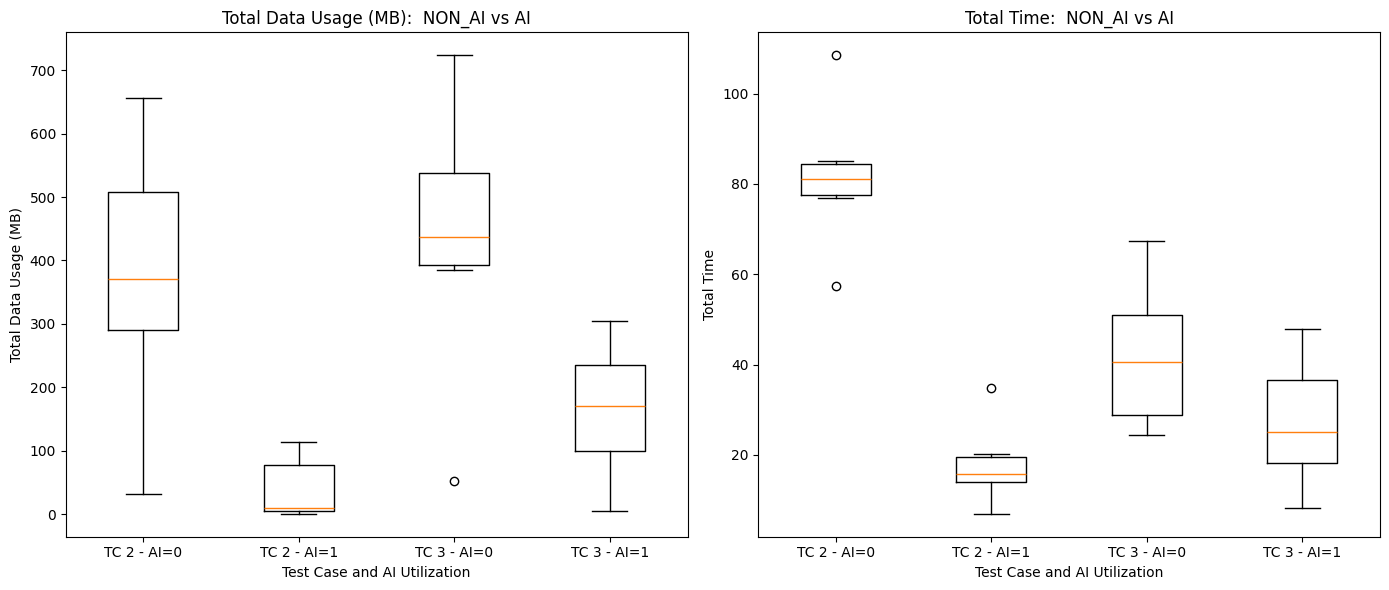

In [ ]:
# Assuming the dataset `mergedf` is already loaded and contains `data_usage_total_MB` column

# Filter the data for Test Case 2 and Test Case 3
test_case_2 = mergedf[mergedf['test_case_id'] == 2]
test_case_3 = mergedf[mergedf['test_case_id'] == 3]

# Split each test case by `used_ai` groups
# Test Case 2
test_case_2_ai_0 = test_case_2[test_case_2['used_ai'] == 0]  # AI not used
test_case_2_ai_1 = test_case_2[test_case_2['used_ai'] == 1]  # AI used

# Test Case 3
test_case_3_ai_0 = test_case_3[test_case_3['used_ai'] == 0]  # AI not used
test_case_3_ai_1 = test_case_3[test_case_3['used_ai'] == 1]  # AI used

# Create subplots to compare Data Usage and Total Time for each test case and AI utilization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Data Usage Comparison by AI Utilization for Test Cases 2 and 3
axes[0].boxplot(
    [
        test_case_2_ai_0['data_usage_total_MB'],  # Test Case 2, AI not used
        test_case_2_ai_1['data_usage_total_MB'],  # Test Case 2, AI used
        test_case_3_ai_0['data_usage_total_MB'],  # Test Case 3, AI not used
        test_case_3_ai_1['data_usage_total_MB']   # Test Case 3, AI used
    ],
    labels=['TC 2 - AI=0', 'TC 2 - AI=1', 'TC 3 - AI=0', 'TC 3 - AI=1']
)
axes[0].set_title('Total Data Usage (MB):  NON_AI vs AI')
axes[0].set_xlabel('Test Case and AI Utilization')
axes[0].set_ylabel('Total Data Usage (MB)')

# Plot 2: Total Time Comparison by AI Utilization for Test Cases 2 and 3
axes[1].boxplot(
    [
        test_case_2_ai_0['duration_min'],  # Test Case 2, AI not used
        test_case_2_ai_1['duration_min'],  # Test Case 2, AI used
        test_case_3_ai_0['duration_min'],  # Test Case 3, AI not used
        test_case_3_ai_1['duration_min']   # Test Case 3, AI used
    ],
    labels=['TC 2 - AI=0', 'TC 2 - AI=1', 'TC 3 - AI=0', 'TC 3 - AI=1']
)
axes[1].set_title('Total Time:  NON_AI vs AI')
axes[1].set_xlabel('Test Case and AI Utilization')
axes[1].set_ylabel('Total Time')

# Adjust layout for better readability
plt.tight_layout()
plt.show()




Interpretation:
There is a statistically significant difference in total bandwidth usage between the two groups (used_ai=1 and used_ai=0).
There is a statistically significant difference in total time between the two groups.


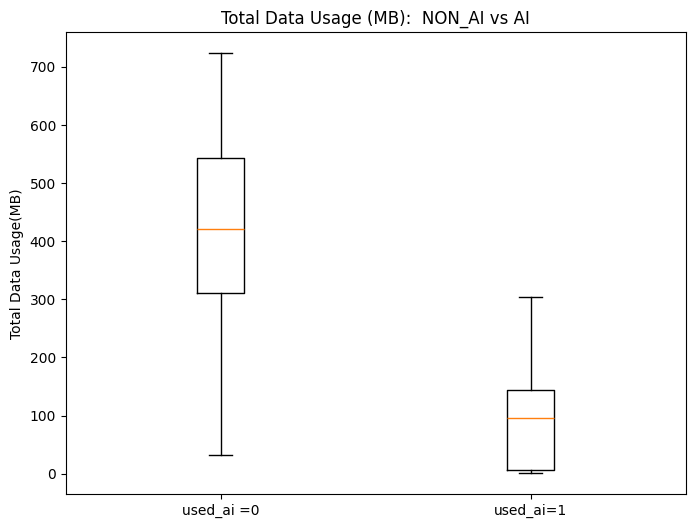

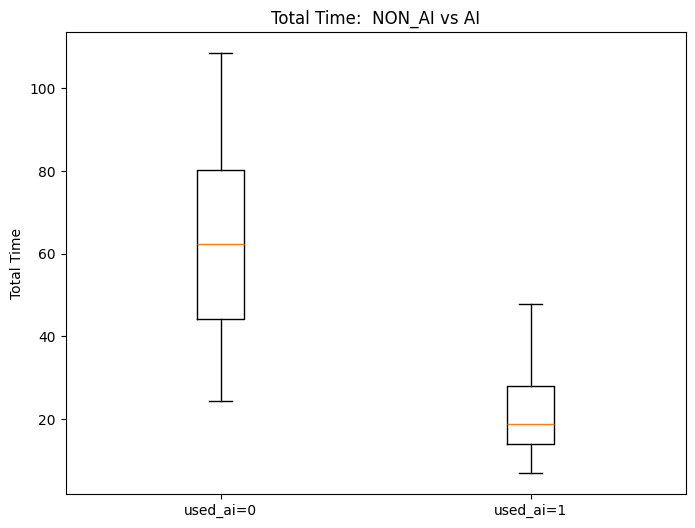

In [ ]:
# Interpretation as text
#used_ai 1 == True
#used_ai 0 == False

print("\nInterpretation:")
if merged_p_value_data_usage < 0.05:
  print("There is a statistically significant difference in total bandwidth usage between the two groups (used_ai=1 and used_ai=0).")
else:
  print("There is no statistically significant difference in total bandwidth usage between the two groups.")

if merged_p_value_time < 0.05:
  print("There is a statistically significant difference in total time between the two groups.")
else:
  print("There is no statistically significant difference in total time between the two groups.")


# Chart for total_bandwidth_usage
plt.figure(figsize=(8, 6))
plt.boxplot([group_0['data_usage_total_MB'], group_1['data_usage_total_MB']], labels=['used_ai =0', 'used_ai=1'])
plt.title('Total Data Usage (MB):  NON_AI vs AI')
plt.ylabel('Total Data Usage(MB)')
plt.show()

# Chart for total_time
plt.figure(figsize=(8, 6))
plt.boxplot([group_0['duration_min'], group_1['duration_min']], labels=['used_ai=0', 'used_ai=1'])
plt.title('Total Time:  NON_AI vs AI')
plt.ylabel('Total Time')
plt.show()

In [ ]:
# Filter the data for Test Case 2 and Test Case 3
test_case_2 = mergedf[mergedf['test_case_id'] == 2]
test_case_3 = mergedf[mergedf['test_case_id'] == 3]

# Split each test case by `used_ai` groups
# Test Case 2
test_case_2_ai_0 = test_case_2[test_case_2['used_ai'] == 0]  # AI not used
test_case_2_ai_1 = test_case_2[test_case_2['used_ai'] == 1]  # AI used

# Test Case 3
test_case_3_ai_0 = test_case_3[test_case_3['used_ai'] == 0]  # AI not used
test_case_3_ai_1 = test_case_3[test_case_3['used_ai'] == 1]  # AI used


###visualize data - interactive

In [ ]:
# Create subplots for data usage and total time
fig = make_subplots(rows=1, cols=2, subplot_titles=['Total Data Usage (MB): Traditional vs AI', 'Total Time: Traditional vs AI'])

# Plot 1: Data Usage Comparison by AI Utilization for Test Cases 2 and 3
fig.add_trace(
    go.Box(y=test_case_2_ai_0['data_usage_total_MB'], name= 'T2 used_ai =0'),
    row=1, col=1
)
fig.add_trace(
    go.Box(y=test_case_2_ai_1['data_usage_total_MB'], name='T2 used_ai =1'),
    row=1, col=1
)
fig.add_trace(
    go.Box(y=test_case_3_ai_0['data_usage_total_MB'], name='T3 used_aiI =0'),
    row=1, col=1
)
fig.add_trace(
    go.Box(y=test_case_3_ai_1['data_usage_total_MB'], name='T3 used_ai =1'),
    row=1, col=1
)

# Plot 2: Total Time Comparison by AI Utilization for Test Cases 2 and 3
fig.add_trace(
    go.Box(y=test_case_2_ai_0['duration_min'], name='T2 used_ai = 0'),
    row=1, col=2
)
fig.add_trace(
    go.Box(y=test_case_2_ai_1['duration_min'], name= 'T2 used_ai =1'),
    row=1, col=2
)
fig.add_trace(
    go.Box(y=test_case_3_ai_0['duration_min'], name='T3 used_aiI =0'),
    row=1, col=2
)
fig.add_trace(
    go.Box(y=test_case_3_ai_1['duration_min'], name='T3 used_ai =1'),
    row=1, col=2
)

# Update layout for titles and axis labels
fig.update_layout(
    title='Comparison of Data Usage and Total Time by AI Utilization',
    width=1200,
    height=750
)

fig.update_xaxes(title_text="Test Case and AI Utilization", row=1, col=1)
fig.update_yaxes(title_text="Total Data Usage (MB)", row=1, col=1)
fig.update_xaxes(title_text="Test Case and AI Utilization", row=1, col=2)
fig.update_yaxes(title_text="Total Time (minutes)", row=1, col=2)

fig.show()


In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Interpretation as text
# used_ai 1 == True == Used_ai
# used_ai 0 == False == Non_used_ai

print("\nInterpretation:")
if merged_p_value_data_usage < 0.05:
    print("There is a statistically significant difference in total bandwidth usage between the two groups (used_ai=1 and used_ai=0).")
else:
    print("There is no statistically significant difference in total bandwidth usage between the two groups.")

if merged_p_value_time < 0.05:
    print("There is a statistically significant difference in total time between the two groups.")
else:
    print("There is no statistically significant difference in total time between the two groups.")

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Data Usage (MB): Traditional vs AI', 'Total Time: Traditional vs AI'))

# Chart for total_bandwidth_usage
fig.add_trace(
    go.Box(y=group_0['data_usage_total_MB'], name='used_ai=0'),
    row=1, col=1
)
fig.add_trace(
    go.Box(y=group_1['data_usage_total_MB'], name='used_ai=1'),
    row=1, col=1
)

# Chart for total_time
fig.add_trace(
    go.Box(y=group_0['duration_min'], name='used_ai=0'),
    row=1, col=2
)
fig.add_trace(
    go.Box(y=group_1['duration_min'], name='used_ai=1'),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height= 700, width=1000,
    showlegend=False,
    yaxis_title_text='Total Data Usage (MB)', # Left chart y-axis
    yaxis2_title_text='Total Time'           # Right chart y-axis
)

fig.show()



Interpretation:
There is a statistically significant difference in total bandwidth usage between the two groups (used_ai=1 and used_ai=0).
There is a statistically significant difference in total time between the two groups.


Distribution

###PDF (Probability Density Function) graph of Test Case 2 and Test Case 3


By using KDE (Kernel Density Estimation), we can estimate the Probability Density Function (PDF) to show how the data is distributed. KDE is particularly useful when we have a limited dataset because it allows us to create a smooth, continuous density curve from discrete data points, even if we don’t have enough data to see a clear pattern.



###**Bandwidth 0.5**
the KDE plot shows **more fluctuations** because it’s more sensitive to individual data points

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy.stats import gaussian_kde

# Data and labels for each combination of test case and AI utilization
data_groups = [
    (test_case_2_ai_0['data_usage_total_MB'], "Test Case 2 - AI Not Use (Data)", "Data Usage (MB)", 'blue'),
    (test_case_2_ai_0['duration_min'], "Test Case 2 - AI Not Used", "Duration (minutes)", 'green'),
    (test_case_2_ai_1['data_usage_total_MB'], "Test Case 2 - AI Used", "Data Usage (MB)", 'orange'),
    (test_case_2_ai_1['duration_min'], "Test Case 2 - AI Used", "Duration (minutes)", 'red'),
    (test_case_3_ai_0['data_usage_total_MB'], "Test Case 3 - AI Not Used", "Data Usage (MB)", 'blue'),
    (test_case_3_ai_0['duration_min'], "Test Case 3 - AI Not Used", "Duration (minutes)", 'green'),
    (test_case_3_ai_1['data_usage_total_MB'], "Test Case 3 - AI Used", "Data Usage (MB)", 'orange'),
    (test_case_3_ai_1['duration_min'], "Test Case 3 - AI Used", "Duration (minutes)", 'red')
]

# Function to calculate KDE
def get_density_curve(data):
    kde = gaussian_kde(data, bw_method=0.5)  # Optional: adjust bw_method for smoothness
    x_values = np.linspace(max(0, min(data) - 10), max(data) + 10, 100)  # Ensure non-negative x range if needed
    y_values = kde(x_values)
    return x_values, y_values

# Initialize separate figures for each test case
fig_case2 = make_subplots(rows=1, cols=2, subplot_titles=["Test Case 2 - Data Usage", "Test Case 2 - Duration"])
fig_case3 = make_subplots(rows=1, cols=2, subplot_titles=["Test Case 3 - Data Usage", "Test Case 3 - Duration"])

# Add each KDE and mean line to the appropriate subplot
for i, (data, title, x_label, color) in enumerate(data_groups):
    x_values, y_values = get_density_curve(data)

    # Determine target figure and column based on test case and data type
    if "Test Case 2" in title:
        target_fig = fig_case2
        col = 1 if "Data Usage" in x_label else 2
    else:
        target_fig = fig_case3
        col = 1 if "Data Usage" in x_label else 2

    # Add KDE trace
    target_fig.add_trace(
        go.Scatter(
            x=x_values,
            y=y_values,
            mode="lines",
            line=dict(color=color, width=2),
            name=title
        ),
        row=1, col=col
    )

    # Calculate mean and add a vertical line to indicate it
    mean_value = np.mean(data)
    target_fig.add_trace(
        go.Scatter(
            x=[mean_value, mean_value],
            y=[0, max(y_values)],
            mode="lines",
            line=dict(color=color, dash="dash"),
            name=f"Mean - {title}",
        ),
        row=1, col=col
    )

# Update layout for both figures with static titles
fig_case2.update_layout(
    title_text="Probability Density Function of Test Case 2 by AI Utilization with Means (bandwidth = 0.5)",
    width=1200,
    height=500
)
fig_case3.update_layout(
    title_text="Probability Density Function of Test Case 3 by AI Utilization with Means (bandwidth = 0.5)",
    width=1200,
    height=500
)

# Update axis labels
for fig in [fig_case2, fig_case3]:
    fig.update_yaxes(title_text="Density")
    fig.update_xaxes(title_text="Data Usage (MB)", row=1, col=1)
    fig.update_xaxes(title_text="Duration (minutes)", row=1, col=2)

# Display both figures
fig_case2.show()
fig_case3.show()


###Automatically set the **Bandwidth**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy.stats import gaussian_kde

# Data and labels for each combination of test case and AI utilization
data_groups = [
    (test_case_2_ai_0['data_usage_total_MB'], "Test Case 2 - Non-AI", "Data Usage (MB)", 'blue'),
    (test_case_2_ai_0['duration_min'], "Test Case 2 - Non-AI", "Duration (minutes)", 'blue'),
    (test_case_2_ai_1['data_usage_total_MB'], "Test Case 2 - AI", "Data Usage (MB)", 'orange'),
    (test_case_2_ai_1['duration_min'], "Test Case 2 - AI", "Duration (minutes)", 'orange'),
    (test_case_3_ai_0['data_usage_total_MB'], "Test Case 3 - Non-AI", "Data Usage (MB)", 'green'),
    (test_case_3_ai_0['duration_min'], "Test Case 3 - Non-AI", "Duration (minutes)", 'green'),
    (test_case_3_ai_1['data_usage_total_MB'], "Test Case 3 - AI", "Data Usage (MB)", 'red'),
    (test_case_3_ai_1['duration_min'], "Test Case 3 - AI", "Duration (minutes)", 'red')
]

# Function to calculate KDE
def get_density_curve(data):
    kde = gaussian_kde(data)  # Optional: adjust bw_method for smoothness
    x_values = np.linspace(max(0, min(data) - 10), max(data) + 10, 100)  # Ensure non-negative x range if needed
    y_values = kde(x_values)
    return x_values, y_values

# Initialize separate figures for each test case
fig_case2 = make_subplots(rows=1, cols=2, subplot_titles=["Test Case 2 - Data Usage", "Test Case 2 - Duration"])
fig_case3 = make_subplots(rows=1, cols=2, subplot_titles=["Test Case 3 - Data Usage", "Test Case 3 - Duration"])

# Add each KDE and mean line to the appropriate subplot
for i, (data, title, x_label, color) in enumerate(data_groups):
    x_values, y_values = get_density_curve(data)

    # Determine target figure and column based on test case and data type
    if "Test Case 2" in title:
        target_fig = fig_case2
        col = 1 if "Data Usage" in x_label else 2
    else:
        target_fig = fig_case3
        col = 1 if "Data Usage" in x_label else 2

    # Add KDE trace
    target_fig.add_trace(
        go.Scatter(
            x=x_values,
            y=y_values,
            mode="lines",
            line=dict(color=color, width=2),
            name=title
        ),
        row=1, col=col
    )

    # Calculate mean and add a vertical line to indicate it
    mean_value = np.mean(data)
    target_fig.add_trace(
        go.Scatter(
            x=[mean_value, mean_value],
            y=[0, max(y_values)],
            mode="lines",
            line=dict(color=color, dash="dash"),
            name=f"Mean - {title}",
        ),
        row=1, col=col
    )

    # Add an annotation for the mean value
    target_fig.add_annotation(
        x=mean_value,
        y=max(y_values) * 0.9,  # Position the annotation slightly below the peak of the KDE curve
        text=f"Mean: {mean_value:.2f}",
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-20,
        font=dict(color=color),
        row=1, col=col
    )

# Update layout for both figures with static titles
fig_case2.update_layout(
    title_text= "Probability Density Function of Test Case 2 by AI Utilization with Means",
    width=1200,
    height=500
)
fig_case3.update_layout(
    title_text= "Probability Density Function of Test Case 3 by AI Utilization with Means",
    width=1200,
    height=500
)

# Update axis labels
for fig in [fig_case2, fig_case3]:
    fig.update_yaxes(title_text="Density")
    fig.update_xaxes(title_text="Data Usage (MB)", row=1, col=1)
    fig.update_xaxes(title_text="Duration (minutes)", row=1, col=2)

# Display both figures
fig_case2.show()
fig_case3.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

test_case_2_ai_0_data_usage = test_case_2_ai_0['data_usage_total_MB']
test_case_2_ai_1_data_usage = test_case_2_ai_1['data_usage_total_MB']
test_case_3_ai_0_data_usage = test_case_3_ai_0['data_usage_total_MB']
test_case_3_ai_1_data_usage = test_case_3_ai_1['data_usage_total_MB']

# Function to calculate KDE with non-negative x_values
def get_density_curve(data):
    kde = gaussian_kde(data)
    x_min = max(0, min(data) - 10)  # Ensure minimum is non-negative
    x_values = np.linspace(x_min, max(data) + 10, 100)  # Generate x values across the range of data
    y_values = kde(x_values)  # Get the density values for each x
    return x_values, y_values

# Calculate density curves and means for each group
x_non_ai_test2, y_non_ai_test2 = get_density_curve(test_case_2_ai_0_data_usage)
mean_non_ai_test2 = np.mean(test_case_2_ai_0_data_usage)

x_ai_test2, y_ai_test2 = get_density_curve(test_case_2_ai_1_data_usage)
mean_ai_test2 = np.mean(test_case_2_ai_1_data_usage)

x_non_ai_test3, y_non_ai_test3 = get_density_curve(test_case_3_ai_0_data_usage)
mean_non_ai_test3 = np.mean(test_case_3_ai_0_data_usage)

x_ai_test3, y_ai_test3 = get_density_curve(test_case_3_ai_1_data_usage)
mean_ai_test3 = np.mean(test_case_3_ai_1_data_usage)

# Create the interactive density plot
fig = go.Figure()

# Add each KDE trace
fig.add_trace(go.Scatter(x=x_non_ai_test2, y=y_non_ai_test2, mode='lines', name="Test Case 2 - Non-AI", line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x_ai_test2, y=y_ai_test2, mode='lines', name="Test Case 2 - AI", line=dict(color='orange')))
fig.add_trace(go.Scatter(x=x_non_ai_test3, y=y_non_ai_test3, mode='lines', name="Test Case 3 - Non-AI", line=dict(color='green')))
fig.add_trace(go.Scatter(x=x_ai_test3, y=y_ai_test3, mode='lines', name="Test Case 3 - AI", line=dict(color='red')))

# Add vertical lines and annotations for each mean
fig.add_shape(type="line", x0=mean_non_ai_test2, y0=0, x1=mean_non_ai_test2, y1=max(y_non_ai_test2),
              line=dict(color="blue", dash="dash"), name="Mean Test Case 2 - Non-AI")
fig.add_annotation(x=mean_non_ai_test2, y=max(y_non_ai_test2), text=f"Mean: {mean_non_ai_test2:.2f}", showarrow=True, arrowhead=1, ax=20, ay=-20, font=dict(color="blue"))

fig.add_shape(type="line", x0=mean_ai_test2, y0=0, x1=mean_ai_test2, y1=max(y_ai_test2),
              line=dict(color="orange", dash="dash"), name="Mean Test Case 2 - AI")
fig.add_annotation(x=mean_ai_test2, y=max(y_ai_test2), text=f"Mean: {mean_ai_test2:.2f}", showarrow=True, arrowhead=1, ax=20, ay=-20, font=dict(color="orange"))

fig.add_shape(type="line", x0=mean_non_ai_test3, y0=0, x1=mean_non_ai_test3, y1=max(y_non_ai_test3),
              line=dict(color="green", dash="dash"), name="Mean Test Case 3 - Non-AI")
fig.add_annotation(x=mean_non_ai_test3, y=max(y_non_ai_test3), text=f"Mean: {mean_non_ai_test3:.2f}", showarrow=True, arrowhead=1, ax=20, ay=-20, font=dict(color="green"))

fig.add_shape(type="line", x0=mean_ai_test3, y0=0, x1=mean_ai_test3, y1=max(y_ai_test3),
              line=dict(color="red", dash="dash"), name="Mean Test Case 3 - AI")
fig.add_annotation(x=mean_ai_test3, y=max(y_ai_test3), text=f"Mean: {mean_ai_test3:.2f}", showarrow=True, arrowhead=1, ax=20, ay=-20, font=dict(color="red"))

# Customize layout
fig.update_layout(
    title="Probability Density Function of Data Usage by Test Case and AI Utilization with Means",
    xaxis_title="Data Usage (MB)",
    yaxis_title="Density",
    width=1000,
    height=600
)

# Show the interactive figure
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde

# Sample data
# Replace these with your actual data
test_case_2_ai_0_duration = test_case_2_ai_0['duration_min']
test_case_2_ai_1_duration = test_case_2_ai_1['duration_min']
test_case_3_ai_0_duration = test_case_3_ai_0['duration_min']
test_case_3_ai_1_duration = test_case_3_ai_1['duration_min']

# Function to calculate KDE
def get_density_curve(data):
    kde = gaussian_kde(data)
    x_values = np.linspace(min(data) - 10, max(data) + 10, 100)  # Generate x values across the range of data
    y_values = kde(x_values)  # Get the density values for each x
    return x_values, y_values

# Calculate density curves and means for each group
x_non_ai_test2, y_non_ai_test2 = get_density_curve(test_case_2_ai_0_duration)
mean_non_ai_test2 = np.mean(test_case_2_ai_0_duration)

x_ai_test2, y_ai_test2 = get_density_curve(test_case_2_ai_1_duration)
mean_ai_test2 = np.mean(test_case_2_ai_1_duration)

x_non_ai_test3, y_non_ai_test3 = get_density_curve(test_case_3_ai_0_duration)
mean_non_ai_test3 = np.mean(test_case_3_ai_0_duration)

x_ai_test3, y_ai_test3 = get_density_curve(test_case_3_ai_1_duration)
mean_ai_test3 = np.mean(test_case_3_ai_1_duration)

# Create the interactive density plot
fig = go.Figure()

# Add each KDE trace
fig.add_trace(go.Scatter(x=x_non_ai_test2, y=y_non_ai_test2, mode='lines', name="Test Case 2 - Non-AI", line=dict(color='blue')))
fig.add_trace(go.Scatter(x=x_ai_test2, y=y_ai_test2, mode='lines', name="Test Case 2 - AI", line=dict(color='orange')))
fig.add_trace(go.Scatter(x=x_non_ai_test3, y=y_non_ai_test3, mode='lines', name="Test Case 3 - Non-AI", line=dict(color='green')))
fig.add_trace(go.Scatter(x=x_ai_test3, y=y_ai_test3, mode='lines', name="Test Case 3 - AI", line=dict(color='red')))

# Add vertical lines and annotations for each mean
fig.add_shape(type="line", x0=mean_non_ai_test2, y0=0, x1=mean_non_ai_test2, y1=max(y_non_ai_test2),
              line=dict(color="blue", dash="dash"), name="Mean Test Case 2 - Non-AI")
fig.add_annotation(x=mean_non_ai_test2, y=max(y_non_ai_test2), text=f"Mean: {mean_non_ai_test2:.2f}", showarrow=True, arrowhead=1, ax=20, ay=-20, font=dict(color="blue"))

fig.add_shape(type="line", x0=mean_ai_test2, y0=0, x1=mean_ai_test2, y1=max(y_ai_test2),
              line=dict(color="orange", dash="dash"), name="Mean Test Case 2 - AI")
fig.add_annotation(x=mean_ai_test2, y=max(y_ai_test2), text=f"Mean: {mean_ai_test2:.2f}", showarrow=True, arrowhead=1, ax=20, ay=-20, font=dict(color="orange"))

fig.add_shape(type="line", x0=mean_non_ai_test3, y0=0, x1=mean_non_ai_test3, y1=max(y_non_ai_test3),
              line=dict(color="green", dash="dash"), name="Mean Test Case 3 - Non-AI")
fig.add_annotation(x=mean_non_ai_test3, y=max(y_non_ai_test3), text=f"Mean: {mean_non_ai_test3:.2f}", showarrow=True, arrowhead=1, ax=20, ay=-20, font=dict(color="green"))

fig.add_shape(type="line", x0=mean_ai_test3, y0=0, x1=mean_ai_test3, y1=max(y_ai_test3),
              line=dict(color="red", dash="dash"), name="Mean Test Case 3 - AI")
fig.add_annotation(x=mean_ai_test3, y=max(y_ai_test3), text=f"Mean: {mean_ai_test3:.2f}", showarrow=True, arrowhead=1, ax=20, ay=-20, font=dict(color="red"))

# Customize layout
fig.update_layout(
    title="Probability Density Function of Duration by Test Case and AI Utilization with Means",
    xaxis_title="Duration (Minutes)",
    yaxis_title="Density",
    width=1000,
    height=600
)

# Show the interactive figure
fig.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from scipy.stats import gaussian_kde

# Data groups for plotting
data_groups = [
    (group_0['data_usage_total_MB'], "Total Data Usage (MB)", "Non-AI", 'blue'),
    (group_1['data_usage_total_MB'], "Total Data Usage (MB)", "AI", 'orange'),
    (group_0['duration_min'], "Total Time (Minutes)", "Non-AI", 'blue'),
    (group_1['duration_min'], "Total Time (Minutes)", "AI", 'orange')
]

# Function to calculate KDE
def get_density_curve(data):
    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), 100)
    y_values = kde(x_values)
    return x_values, y_values

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Total Data Usage (MB): NON_AI vs AI', 'Total Time: NON_AI vs AI'))

# Plot PDF for each group
for i, (data, title, label, color) in enumerate(data_groups):
    x_values, y_values = get_density_curve(data)

    # Determine column based on the title (Data Usage vs. Time)
    col = 1 if "Data Usage" in title else 2

    # Add each KDE trace
    fig.add_trace(
        go.Scatter(
            x=x_values,
            y=y_values,
            mode="lines",
            line=dict(color=color, width=2),
            name=f"{label} - {title}"
        ),
        row=1, col=col
    )

    # Calculate mean and add a vertical dashed line to indicate it
    mean_value = np.mean(data)
    fig.add_trace(
        go.Scatter(
            x=[mean_value, mean_value],
            y=[0, max(y_values)],
            mode="lines",
            line=dict(color=color, dash="dash"),
            name=f"Mean - {label} ({mean_value:.2f})"
        ),
        row=1, col=col
    )

# Update layout for both figures with titles
fig.update_layout(
    height=600, width=1000,
    title_text="Probability Density Function of Merged Data Usage and Total Time by AI Utilization",
    legend=dict(title="Groups", itemsizing="constant")
)

# Update axis labels
fig.update_yaxes(title_text="Density", row=1, col=1)
fig.update_yaxes(title_text="Density", row=1, col=2)
fig.update_xaxes(title_text="Data Usage (MB)", row=1, col=1)
fig.update_xaxes(title_text="Time (Minutes)", row=1, col=2)

fig.show()
